In [1]:
import math
import numpy as np
import csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [2]:
df = pd.read_csv('/content/data_1.csv')
df.head()

,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Diện tích(Km2)(*),Diện tích (Km2)(*),Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,An Giang,2011,"3536,7","2097,5","593,1",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,An Giang,2012,"3536,7","2077,9","587,5",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,An Giang,2013,"3536,7","2051,6","580,1",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,An Giang,2014,"3536,7","2024,6","572,5",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,An Giang,2015,"3536,7","2000,9","565,8",..,..,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.dropna(axis=1, how='all')

In [4]:
df = df.replace("..", np.nan)

In [5]:
df = df.rename(columns={
    'Diện tích(Km2)(*)': 'Diện tích phụ lục 1(Km2)',
    'Diện tích (Km2)(*)': 'Diện tích phụ lục 2(Km2)'
})

In [6]:
df.head()

,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Diện tích phụ lục 1(Km2),Diện tích phụ lục 2(Km2)
0,An Giang,2011,"3536,7","2097,5","593,1",NaN,NaN
1,An Giang,2012,"3536,7","2077,9","587,5",NaN,NaN
2,An Giang,2013,"3536,7","2051,6","580,1",NaN,NaN
3,An Giang,2014,"3536,7","2024,6","572,5",NaN,NaN
4,An Giang,2015,"3536,7","2000,9","565,8",NaN,NaN


In [7]:
df['Diện tích phụ lục 1(Km2)'] = df['Diện tích phụ lục 1(Km2)'].fillna(df['Diện tích phụ lục 2(Km2)'])

In [8]:
df['Diện tích(Km2)'] = df['Diện tích(Km2)'].fillna(df['Diện tích phụ lục 1(Km2)'])

In [9]:
df

,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Diện tích phụ lục 1(Km2),Diện tích phụ lục 2(Km2)
0,An Giang,2011,"3536,7","2097,5","593,1",NaN,NaN
1,An Giang,2012,"3536,7","2077,9","587,5",NaN,NaN
2,An Giang,2013,"3536,7","2051,6","580,1",NaN,NaN
3,An Giang,2014,"3536,7","2024,6","572,5",NaN,NaN
4,An Giang,2015,"3536,7","2000,9","565,8",NaN,NaN
...,...,...,...,...,...,...,...
905,Đồng Tháp,2019,"3383,8","1598,8","472,0","3383,8",NaN
906,Đồng Tháp,2020,"3382,3","1600,0","473,0","3382,3","3382,3"
907,Đồng Tháp,2021,"3382,3","1601,3","473,0","3382,3",NaN
908,Đồng Tháp,2022,"3382,3","1600,2","473,0","3382,3",NaN


In [10]:
df.drop(['Diện tích phụ lục 1(Km2)', 'Diện tích phụ lục 2(Km2)'], axis=1, inplace=True)

In [11]:
df.head()

,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2)
0,An Giang,2011,"3536,7","2097,5","593,1"
1,An Giang,2012,"3536,7","2077,9","587,5"
2,An Giang,2013,"3536,7","2051,6","580,1"
3,An Giang,2014,"3536,7","2024,6","572,5"
4,An Giang,2015,"3536,7","2000,9","565,8"


In [12]:
_df = pd.read_csv('/content/data_2.csv')
_df.head()

,Địa phương,Phân tổ,2005,2007,2008,2009,2010,2011,2012,2013,...,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,An Giang,Tỷ suất sinh thô,"18,40","16,90","16,90","17,60","17,30","16,40","17,50","16,30",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,An Giang,Tỷ suất chết thô,"5,20","5,10","5,00","8,00","7,90","7,30","7,80","7,80",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,An Giang,Tỷ lệ tăng tự nhiên,"13,20","11,80","11,90","9,70","9,30","9,00","9,60","8,50",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bà Rịa - Vũng Tàu,Tỷ suất sinh thô,"18,50","16,90","17,10","17,70","15,60","15,20","14,90","16,20",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bà Rịa - Vũng Tàu,Tỷ suất chết thô,"4,40","4,40","4,10","6,60","6,50","6,30","7,10","7,50",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
_df = _df.dropna(axis=1, how='all')

In [14]:
_df = _df.replace("..", np.nan)

In [15]:
_df = _df.rename(columns={
    'Sơ bộ 2023': '2023',
})

In [16]:
_df.head()

,Địa phương,Phân tổ,2005,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,An Giang,Tỷ suất sinh thô,"18,40","16,90","16,90","17,60","17,30","16,40","17,50","16,30","16,70","12,50","12,50","11,60","11,40","11,90","12,51","12,10","11,70","10,80"
1,An Giang,Tỷ suất chết thô,"5,20","5,10","5,00","8,00","7,90","7,30","7,80","7,80","8,80","7,50","8,80","9,70","8,60","9,70","9,27","8,10","9,03","6,85"
2,An Giang,Tỷ lệ tăng tự nhiên,"13,20","11,80","11,90","9,70","9,30","9,00","9,60","8,50","7,90","4,90","3,70","1,90","2,80","2,30","3,24","3,99","2,67","3,95"
3,Bà Rịa - Vũng Tàu,Tỷ suất sinh thô,"18,50","16,90","17,10","17,70","15,60","15,20","14,90","16,20","16,50","12,50","12,10","10,50","11,00","14,80","15,75","13,90","15,70","11,50"
4,Bà Rịa - Vũng Tàu,Tỷ suất chết thô,"4,40","4,40","4,10","6,60","6,50","6,30","7,10","7,50","5,10","4,50","4,40","5,60","5,00","5,00","4,77","5,40","4,65","5,35"


In [17]:
data_melted = _df.melt(id_vars=["Địa phương", "Phân tổ"], var_name="Năm", value_name="Tỷ lệ")

data_melted = data_melted.dropna(subset=["Năm", "Tỷ lệ"])
data_melted = data_melted.loc[~data_melted["Năm"].str.contains("Unnamed")]

data_melted["Năm"] = data_melted["Năm"].astype(int)
data_melted["Tỷ lệ"] = data_melted["Tỷ lệ"].str.replace(",", ".").astype(float)

data_pivot = data_melted.pivot_table(index=["Địa phương", "Năm"], columns="Phân tổ", values="Tỷ lệ").reset_index()

data_pivot.columns.name = None
data_pivot = data_pivot.rename(columns={
    "Tỷ suất sinh thô": "Tỷ suất sinh thô",
    "Tỷ suất chết thô": "Tỷ suất chết thô",
    "Tỷ lệ tăng tự nhiên": "Tỷ lệ tăng tự nhiên"
})

data_pivot.head()

,Địa phương,Năm,Tỷ lệ tăng tự nhiên,Tỷ suất chết thô,Tỷ suất sinh thô
0,An Giang,2005,13.2,5.2,18.4
1,An Giang,2007,11.8,5.1,16.9
2,An Giang,2008,11.9,5.0,16.9
3,An Giang,2009,9.7,8.0,17.6
4,An Giang,2010,9.3,7.9,17.3


In [18]:
df = df.applymap(lambda x: x.title() if isinstance(x, str) else x)
data_pivot = data_pivot.applymap(lambda x: x.title() if isinstance(x, str) else x)

<ipython-input-18-b2951ad7c0ae>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.title() if isinstance(x, str) else x)
<ipython-input-18-b2951ad7c0ae>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_pivot = data_pivot.applymap(lambda x: x.title() if isinstance(x, str) else x)


In [19]:
final_df = pd.merge(df, data_pivot, left_on=['Địa phương', 'Năm'], right_on=['Địa phương', 'Năm'], how='left')
final_df = final_df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
final_df = final_df.apply(pd.to_numeric, errors='ignore')
final_df

<ipython-input-19-400e816d62ad>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  final_df = final_df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
<ipython-input-19-400e816d62ad>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  final_df = final_df.apply(pd.to_numeric, errors='ignore')


,Địa phương,Năm,Diện tích(Km2),Dân số trung bình (Nghìn người),Mật độ dân số (Người/km2),Tỷ lệ tăng tự nhiên,Tỷ suất chết thô,Tỷ suất sinh thô
0,An Giang,2011,3536.7,2097.5,593.1,9.00,7.30,16.40
1,An Giang,2012,3536.7,2077.9,587.5,9.60,7.80,17.50
2,An Giang,2013,3536.7,2051.6,580.1,8.50,7.80,16.30
3,An Giang,2014,3536.7,2024.6,572.5,7.90,8.80,16.70
4,An Giang,2015,3536.7,2000.9,565.8,4.90,7.50,12.50
...,...,...,...,...,...,...,...,...
905,Đồng Tháp,2019,3383.8,1598.8,472.0,5.00,6.90,11.90
906,Đồng Tháp,2020,3382.3,1600.0,473.0,6.30,6.66,12.95
907,Đồng Tháp,2021,3382.3,1601.3,473.0,4.72,7.60,12.40
908,Đồng Tháp,2022,3382.3,1600.2,473.0,1.70,8.70,10.40


# Exploratory Data Analysis

### Mô tả

- Dữ liệu được thu thập từ trang web của Tổng cục Thống kê Việt Nam https://www.gso.gov.vn/

- Mô tả: Dữ liệu ghi nhận sự thay đổi về sự gia tăng dân số theo 63 tỉnh, thành phố của Việt Nam, được quan sát từ năm 2011 đến năm 2022.

In [20]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 910 entries, 0 to 909
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Địa phương                       910 non-null    object 
 1   Năm                              910 non-null    int64  
 2   Diện tích(Km2)                   910 non-null    float64
 3   Dân số trung bình (Nghìn người)  910 non-null    float64
 4   Mật độ dân số (Người/km2)        910 non-null    float64
 5   Tỷ lệ tăng tự nhiên              845 non-null    float64
 6   Tỷ suất chết thô                 845 non-null    float64
 7   Tỷ suất sinh thô                 845 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 57.0+ KB


Dataset gồm có 8 trường dữ liệu được lấy từ trang web như sau:

- ID: tên 63 tỉnh/thành phố của Việt Nam
- Năm: năm ghi nhận số liệu (format: yyyy)
- Diện tích: diện tích của thành phố (km2)
- Dân số trung bình: theo từng thành phố (nghìn người)
-	Mật độ dân số: Mật độ dân số là số người sinh sống trên một đơn vị diện tích, lấy theo giá trị trung bình. Từ giá trị này bạn có thể suy ra lượng tài nguyên mà một khu vực cần có, và dựa vào đó so sánh các khu vực khác nhau. Công thức tính: Mật độ dân số = (Dân số trung bình / Diện tích) * 1000 (đơn vị: Người/km2)
- Tỉ suất sinh thô: Tỷ suất sinh thô (CBR – Crude Birth Rate): được sử dụng rộng rãi trong dân số học, đó là tỷ số giữa số trẻ em được sinh ra trong năm so với số dân trung bình ở cùng thời gian ấy với đơn vị tính bằng phần nghìn (đơn vị ‰). Tỷ suất sinh thô được tính theo công thức :

  CBR = (Số trẻ em sinh ra trong năm / Tổng số dân trung bình của năm) * 1000
- Tỷ suất chết thô (CDR - Crude Death Rate) là chỉ tiêu đơn giản nhưng phổ biến nhất trong việc đánh giá mức tử vong của dân số. Nó được xác định bằng số người chết trong năm tính bình quân cho 1.000 dân số năm đó (đơn vị ‰)

  CDR = (Số người chết trong năm / Tổng số dân trung bình của năm) * 1000

- Tỷ lệ tăng tự nhiên cho biết cứ 1.000 dân số trung bình của một năm, thì có bao nhiêu người tăng lên trong năm do hậu quả của 2 yếu tố sinh ra và chết đi. Tỷ lệ gia tăng tự nhiên hay tỉ suất gia tăng tự nhiên là đến sự khác biệt hay sự chênh lệch giữa tỷ lệ sinh thô và tỷ lệ tử vong thô của một dân số nhất định (đơn vị ‰). Công thức xác định tỷ lệ gia tăng tự nhiên cụ thể như sau:

  Tỷ lệ tăng tự nhiên = Tỷ suất sinh thô – tỷ suất chết thô

### Ý nghĩa dữ liệu
- Trị số của tỷ suất sinh thô có sự biến động theo thời gian và không gian, trị số này phụ thuộc vào nhiều yếu tố: cường độ của quá trình sinh đẻ, cơ cấu dân số theo độ tuổi, giới tính và cả tình hình hôn nhân. Vì vậy tỷ suất sinh thô chỉ là một khái niệm phản ánh gần đúng mức sinh thực tế nhưng có ưu điểm là đơn giản, dễ tính toán, dễ so sánh nên được dùng khá phổ biến.
- Tỷ suất chết thô có ảnh hưởng đến quy mô, cơ cấu và tốc độ gia tăng dân số. So với các chỉ tiêu khác về mức độ chết, tỷ suất chết thô là chỉ tiêu có nguồn thông tin dễ thu thập, thường sẵn có và được tính toán đơn giản.
- Tỷ suất tăng tự nhiên dân số có ưu điểm là dễ tính toán, không đòi hỏi nhiều số liệu. Song nó có nhược điểm là phụ thuộc rất chặt vào cơ cấu dân số theo độ tuổi, vì thế nó không được sử dụng trực tiếp để đánh giá mức độ tái sản suất dân số.
- Do tỷ suất tăng tự nhiên dân số trực tiếp phụ thuộc vào tỷ suất sinh thô (CBR) và tỷ suất chết thô (CDR), nên không bao giờ được dùng để đánh giá mức độ sinh hoặc kết quả công tác kế hoạch hóa gia đình.

### Ngữ cảnh sử dụng dữ liệu

- Đánh giá sự gia tăng dân số tự nhiên được hiểu cơ bản là quá trình tái sản xuất dân cư, thế hệ già được thay thế bằng thế hệ trẻ
- Tổ chức Y tế Thế giới (WHO) đã có được tất cả các giá trị được tính toán cho mỗi quốc gia trên toàn thế giới để từ đó có thể lên kế hoạch về hỗ trợ từng quốc gia.
- Tổ chức Y tế Thế giới cũng đã sử dụng các giá trị của tốc độ gia tăng tự nhiên để nhằm mục đích có thể đánh giá tiền tệ, nguồn nhân lực và sự hỗ trợ về mặt kĩ thuật họ đã cung cấp cho từng quốc gia.
- Để đưa ra các giải pháp thay đổi cơ cấu dân số, đồng thời một số các vấn đề khác liên quan đến kinh tế và môi trường.

In [21]:
area = ['Bắc Trung Bộ Và Duyên Hải Miền Trung',
        'Trung Du Và Miền Núi Phía Bắc',
        'Đông Nam Bộ',
        'Đồng Bằng Sông Cửu Long',
        'Đồng Bằng Sông Hồng',
        'Tây Nguyên']

area_df = final_df[final_df['Địa phương'].isin(area)]
city_df = final_df[~final_df['Địa phương'].isin(area) & (final_df['Địa phương'] != 'Cả Nước')]

In [22]:
city_df['Địa phương'].nunique()

63

# Data Visualization

In [23]:
import matplotlib.pyplot as plt

In [24]:
vietnam_df = final_df[final_df['Địa phương'] == 'Cả Nước']

In [25]:
vietnam_df['Mật độ dân số (Người/km2)']

,Mật độ dân số (Người/km2)
182,266.3
183,269.5
184,272.5
185,275.6
186,278.7
187,281.5
188,284.7
189,288.0
190,291.0
191,295.0


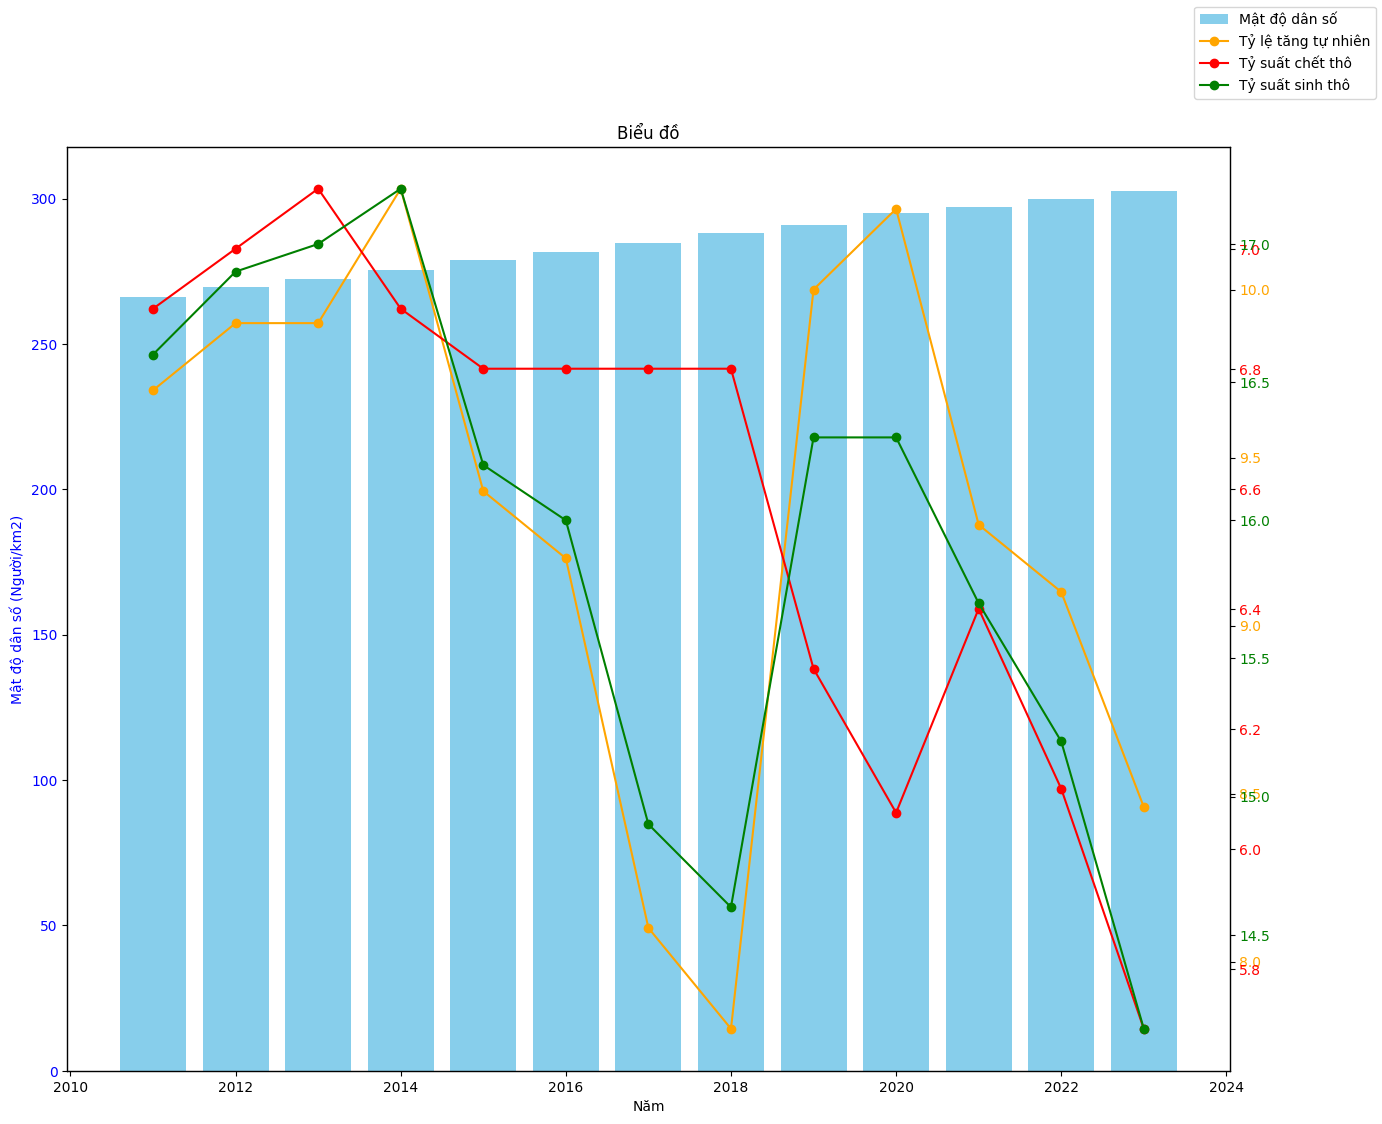

In [26]:

fig, ax1 = plt.subplots(figsize=(15, 12))
ax1.bar(vietnam_df['Năm'], vietnam_df['Mật độ dân số (Người/km2)'], color='skyblue', label='Mật độ dân số')
ax1.set_xlabel('Năm')
ax1.set_ylabel('Mật độ dân số (Người/km2)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(vietnam_df['Năm'], vietnam_df['Tỷ lệ tăng tự nhiên'], color='orange', marker='o', label='Tỷ lệ tăng tự nhiên')
# ax2.set_ylabel('Tỷ lệ tăng tự nhiên', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax3 = ax1.twinx()
ax3.plot(vietnam_df['Năm'], vietnam_df['Tỷ suất chết thô'], color='red', marker='o', label='Tỷ suất chết thô')
# ax3.set_ylabel('Tỷ suất chết thô', color='red')
ax3.tick_params(axis='y', labelcolor='red')

ax4 = ax1.twinx()
ax4.plot(vietnam_df['Năm'], vietnam_df['Tỷ suất sinh thô'], color='green', marker='o', label='Tỷ suất sinh thô')
# ax4.set_ylabel('Tỷ suất sinh thô', color='green')
ax4.tick_params(axis='y', labelcolor='green')

fig.legend(loc='upper right')

plt.title('Biểu đồ')
plt.show()

In [27]:
def histogram(column, year, color, ax):
    sub_df = city_df[city_df['Năm'] == year]
    n, bins, patches = ax.hist(sub_df[column], bins=10, color=color, edgecolor='black')
    for i in range(len(patches)):
        height = patches[i].get_height()
        ax.text(patches[i].get_x() + patches[i].get_width() / 2, height,
                f'{int(height)}', ha='center', va='bottom')
    ax.set_xlabel(column)
    ax.set_ylabel('Số thành phố')
    ax.set_title(f'Histogram của {column} - {year}')
    ax.grid(True)

In [28]:
years = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

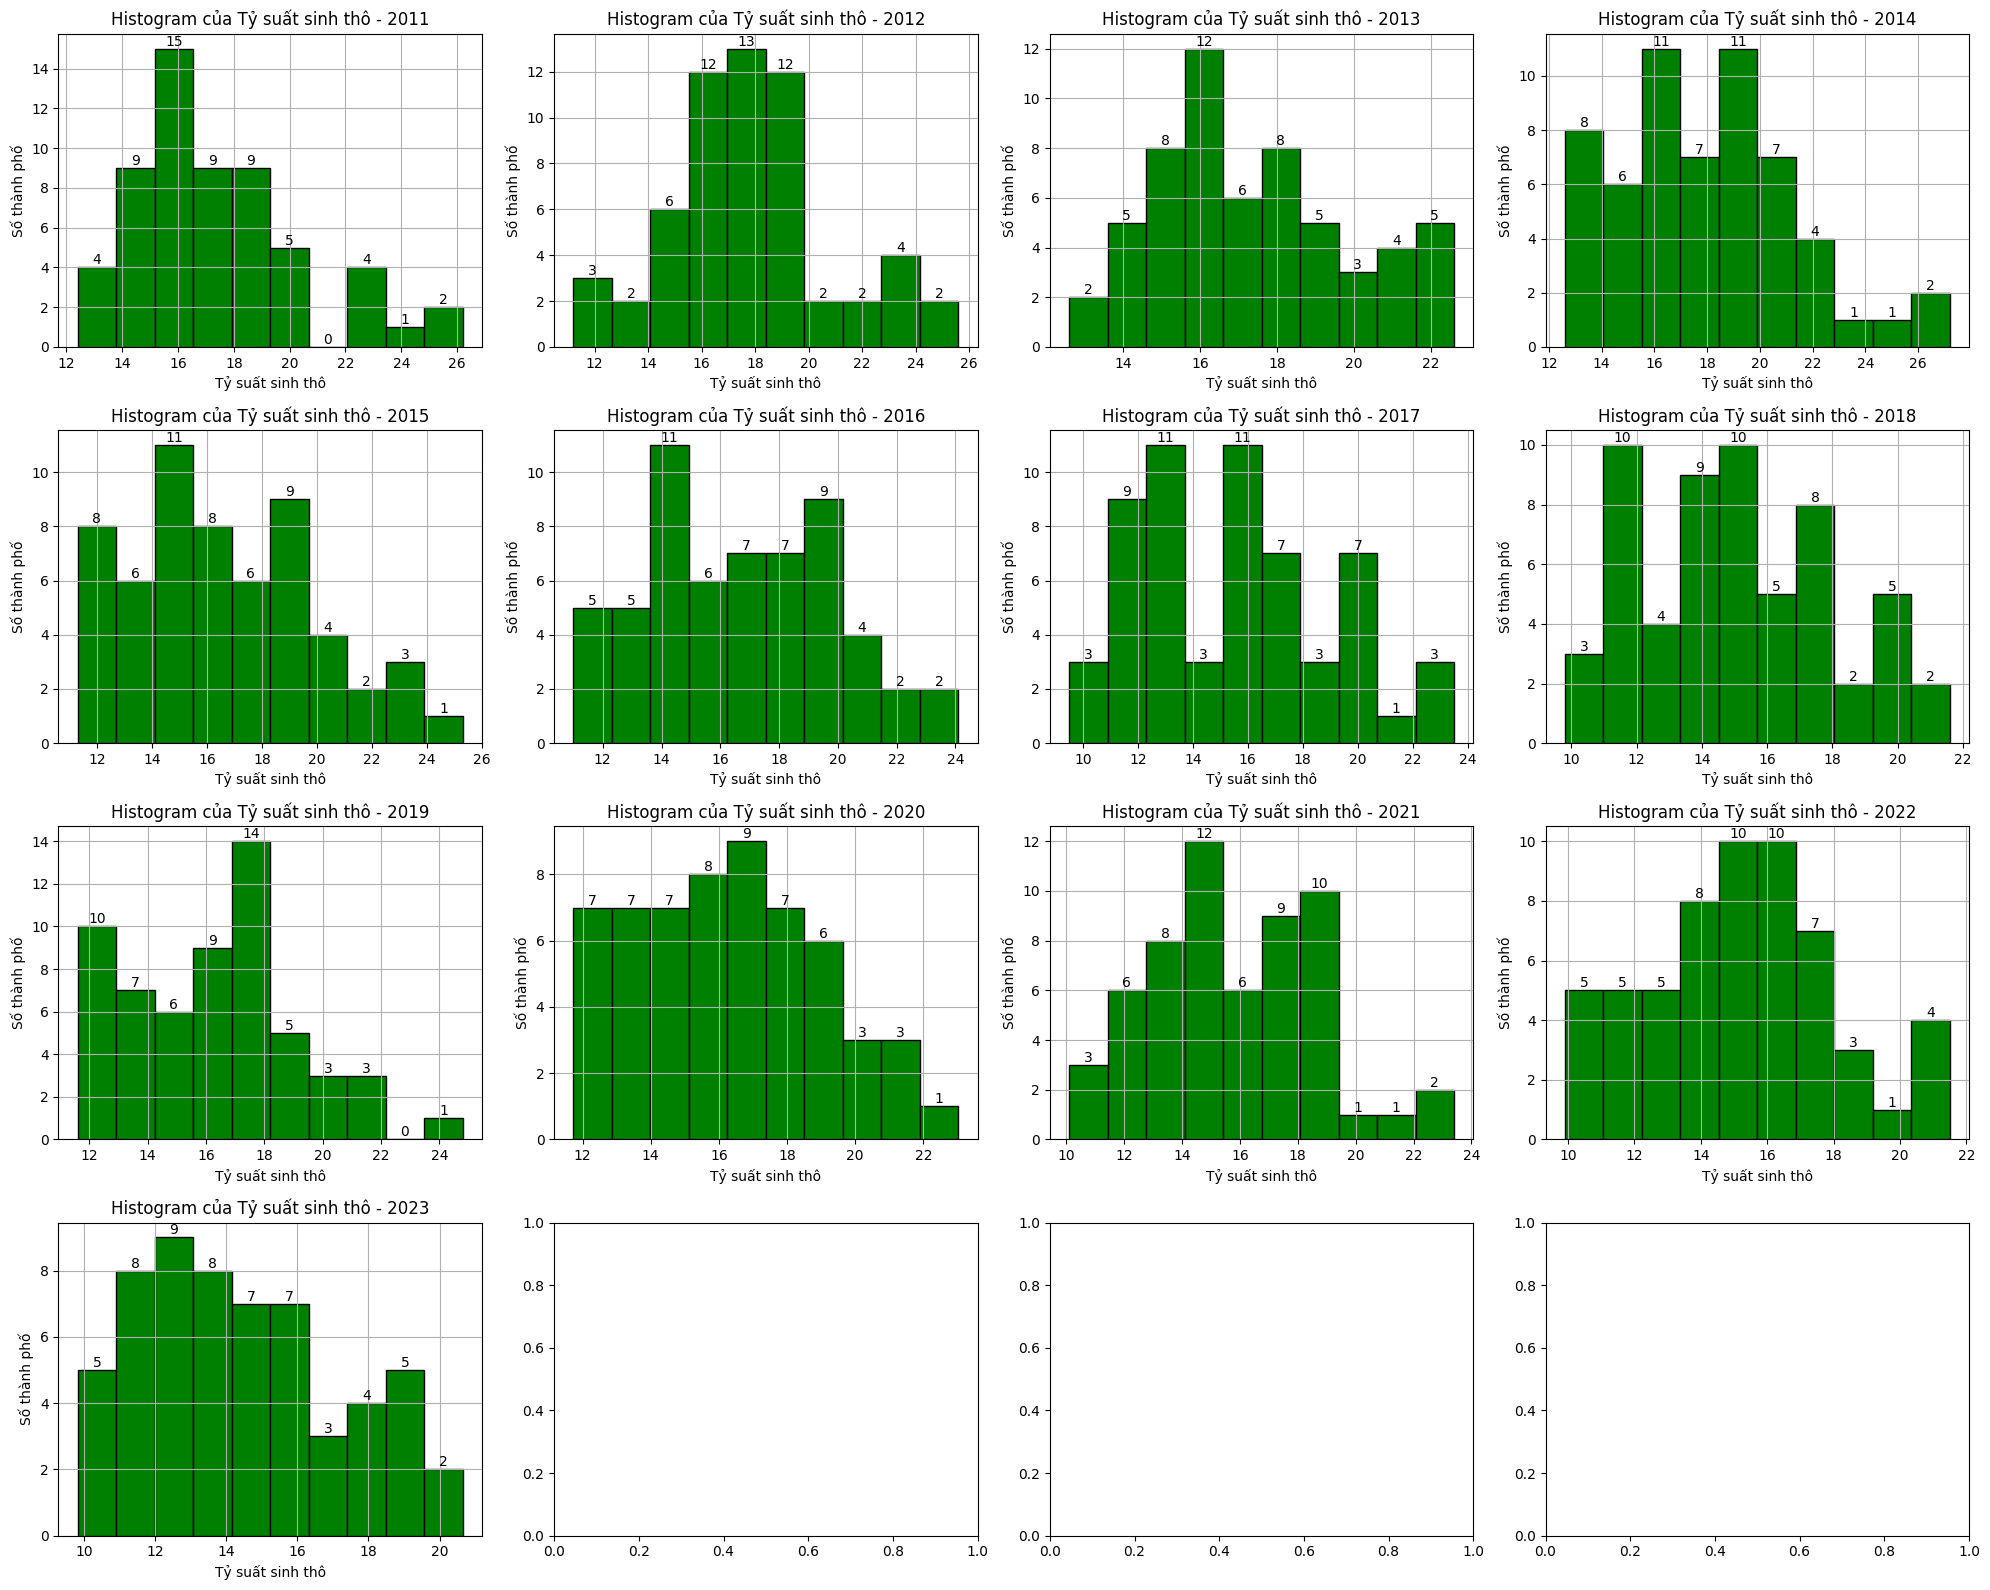

In [29]:
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for index, year in enumerate(years):
  histogram('Tỷ suất sinh thô', year, 'green', axs[index])
plt.tight_layout()
plt.show()

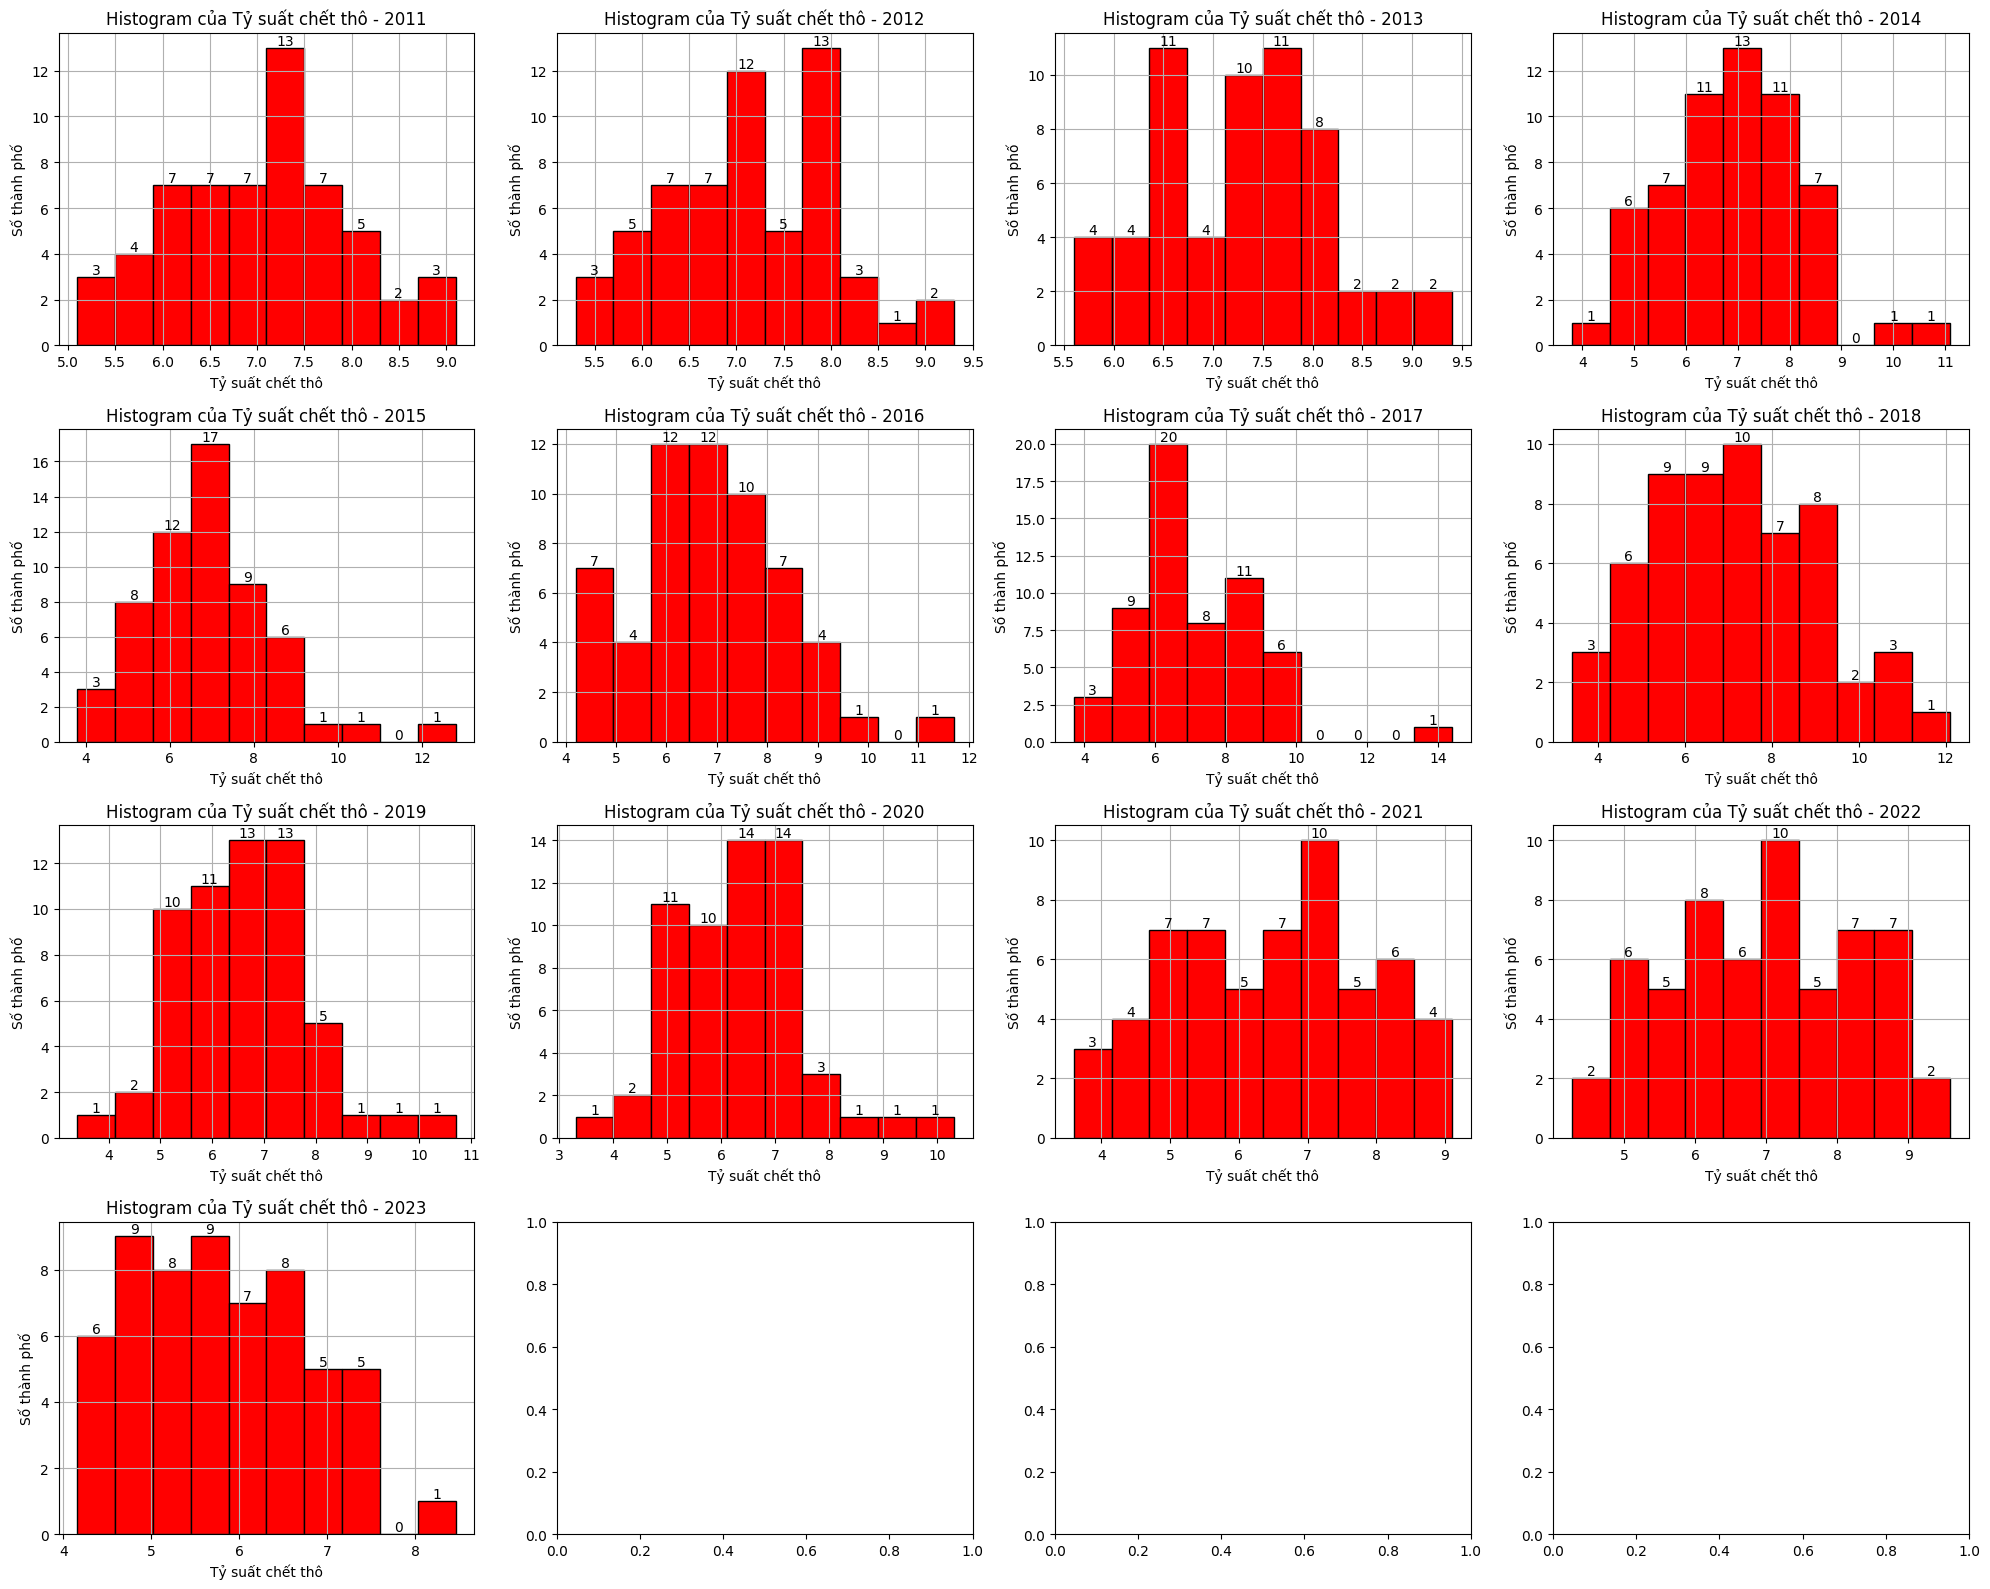

In [30]:
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for index, year in enumerate(years):
  histogram('Tỷ suất chết thô', year, 'red', axs[index])
plt.tight_layout()
plt.show()

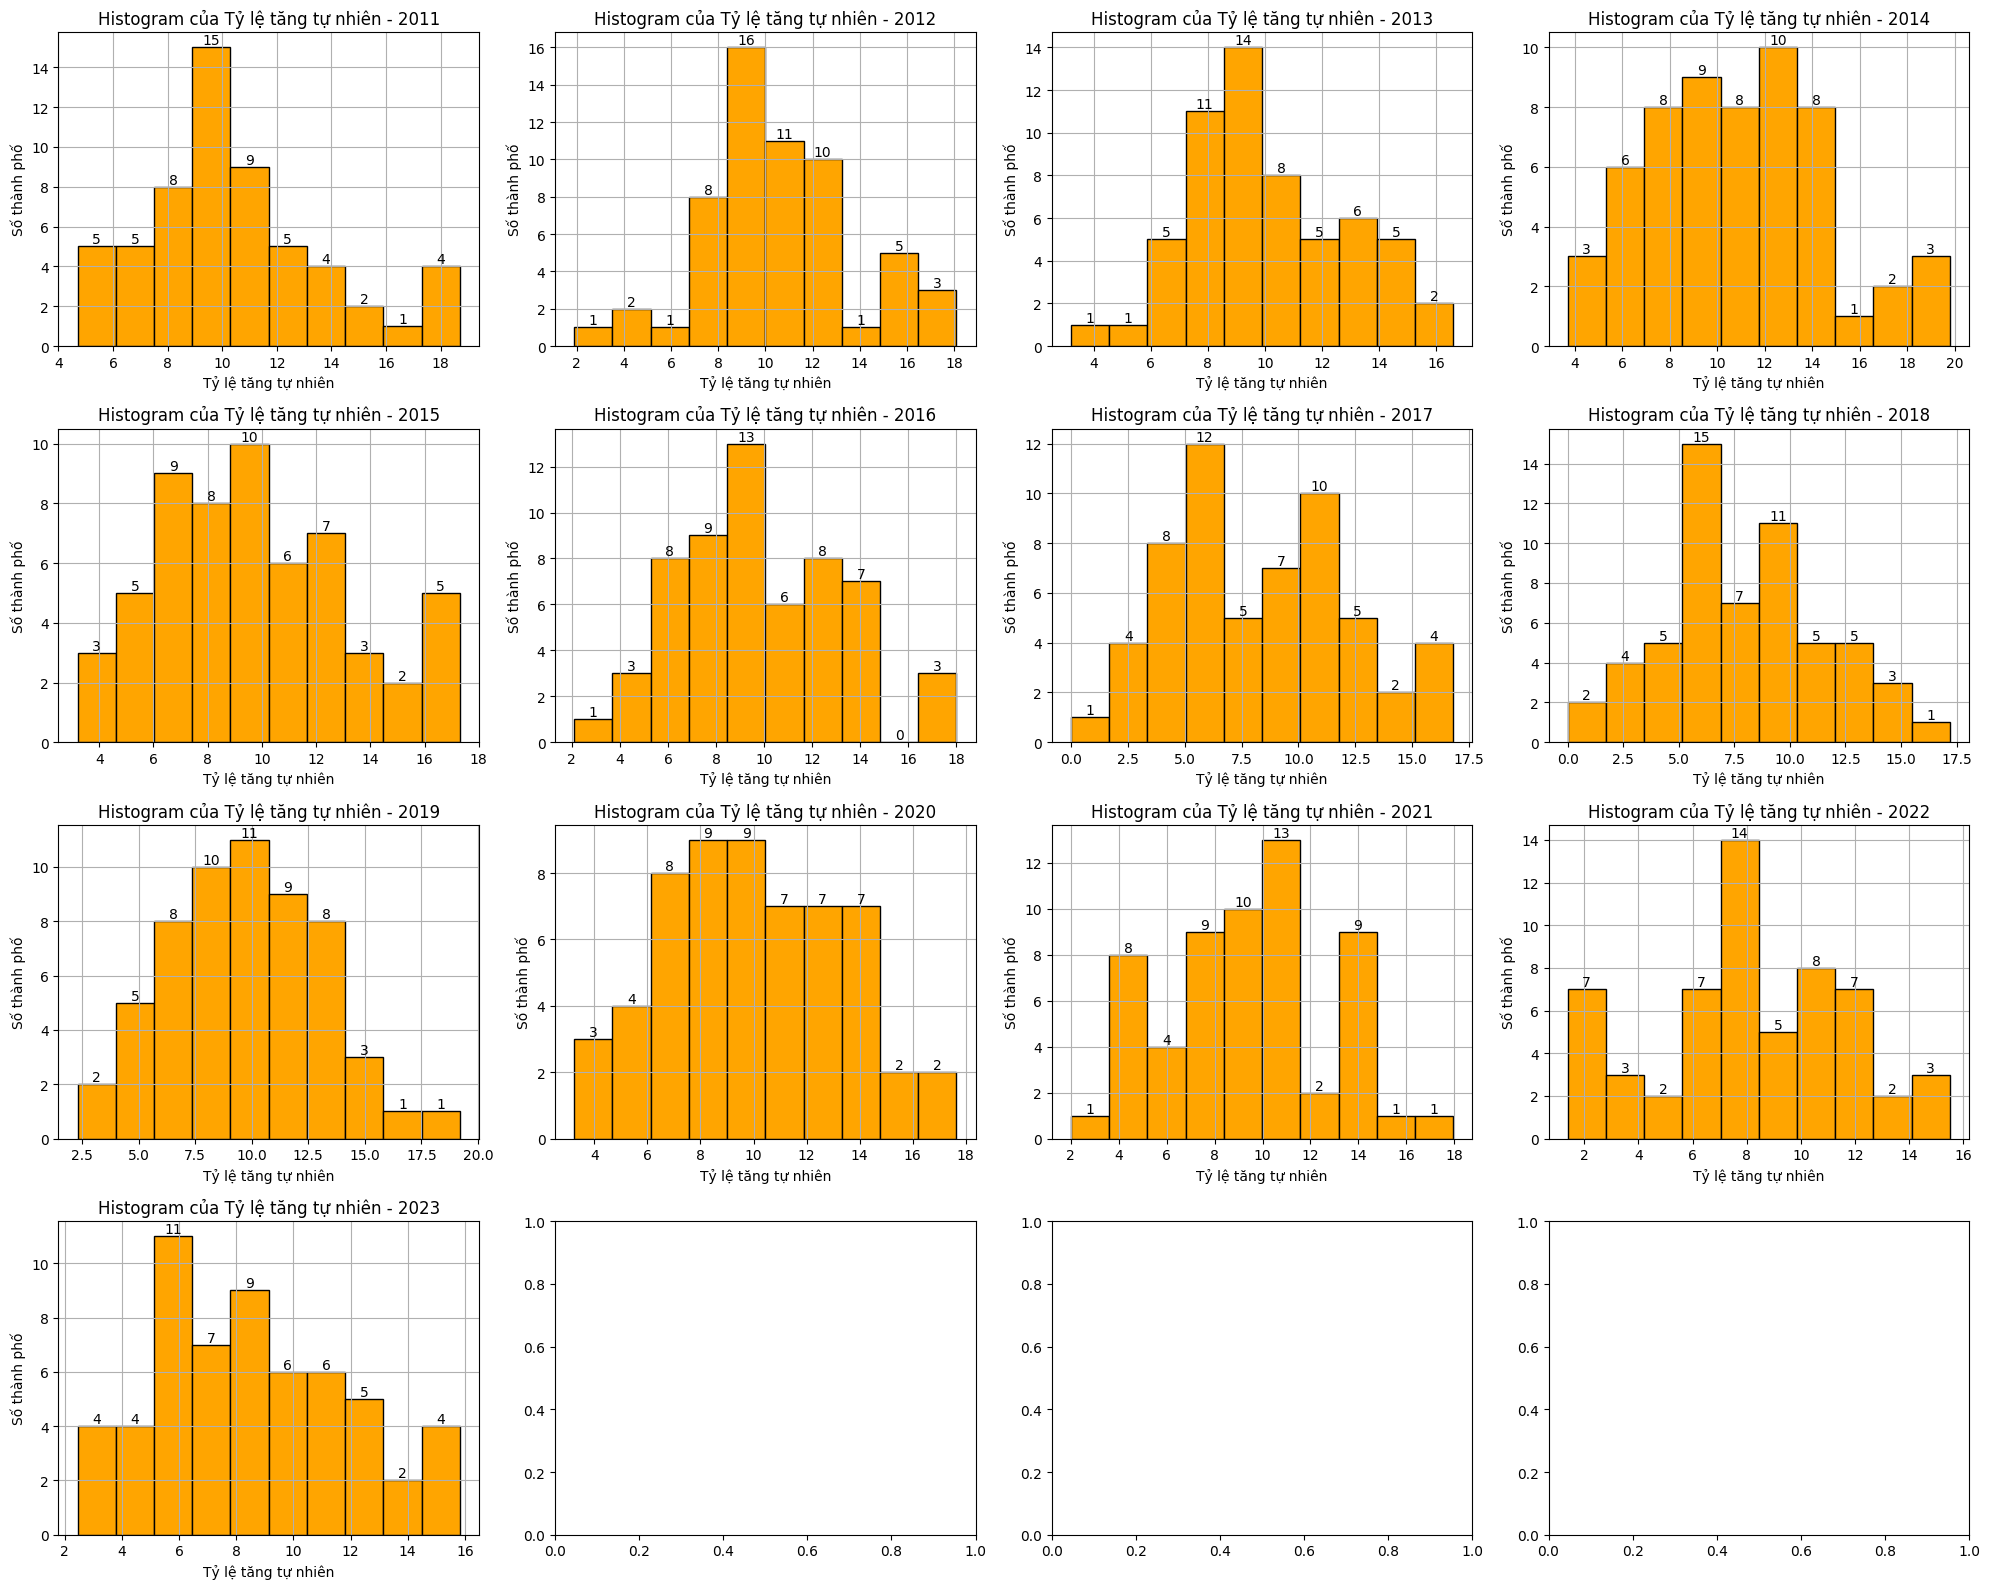

In [31]:
fig, axs = plt.subplots(4, 4, figsize=(20, 16))
axs = axs.flatten()

for index, year in enumerate(years):
  histogram('Tỷ lệ tăng tự nhiên', year, 'orange', axs[index])
plt.tight_layout()
plt.show()

In [32]:
color_map = {
    'Bắc Trung Bộ Và Duyên Hải Miền Trung': 'orange',
    'Trung Du Và Miền Núi Phía Bắc': 'yellow',
    'Đông Nam Bộ': 'green',
    'Đồng Bằng Sông Cửu Long': 'blue',
    'Đồng Bằng Sông Hồng': 'pink',
    'Tây Nguyên': 'brown',
}

<ipython-input-33-fad1f84ef0d5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Địa phương', y='Tỷ suất sinh thô', data=area_df, palette=color_map)


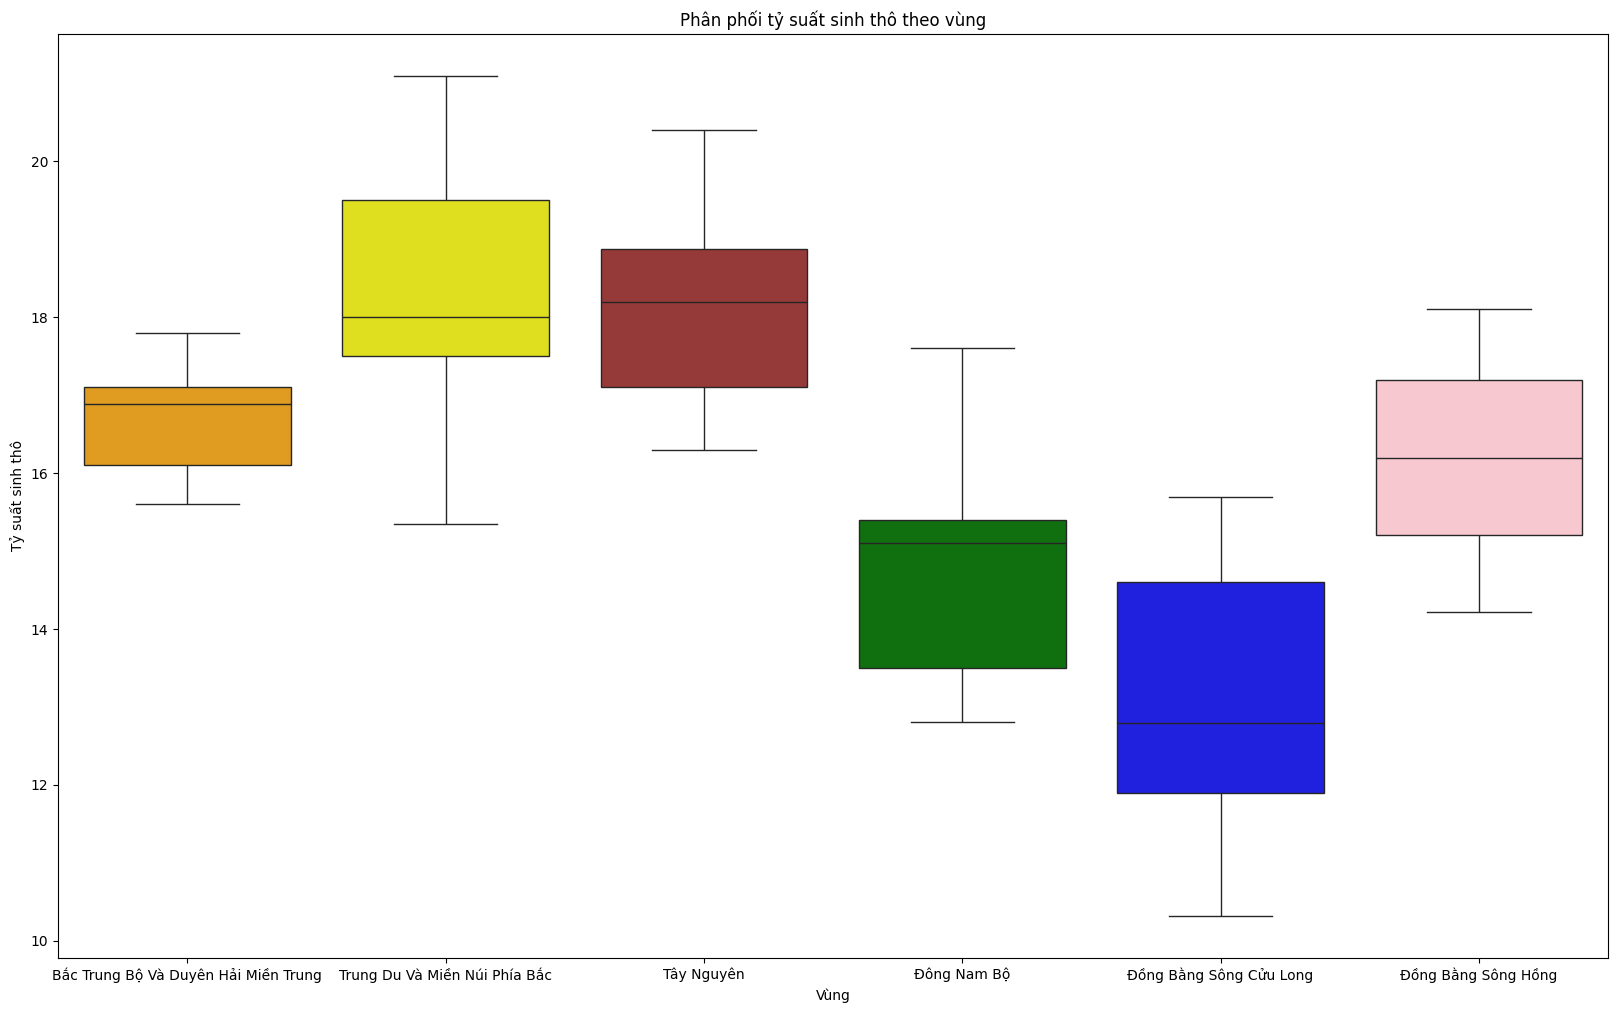

In [33]:
# palette = area_df['Địa phương'].map(color_map)

plt.figure(figsize=(20, 12))
sns.boxplot(x='Địa phương', y='Tỷ suất sinh thô', data=area_df, palette=color_map)
plt.xlabel('Vùng')
plt.ylabel('Tỷ suất sinh thô')
plt.title('Phân phối tỷ suất sinh thô theo vùng')
plt.show()

<ipython-input-34-fda5ff3a865c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Địa phương', y='Tỷ suất chết thô', data=area_df, palette=color_map)


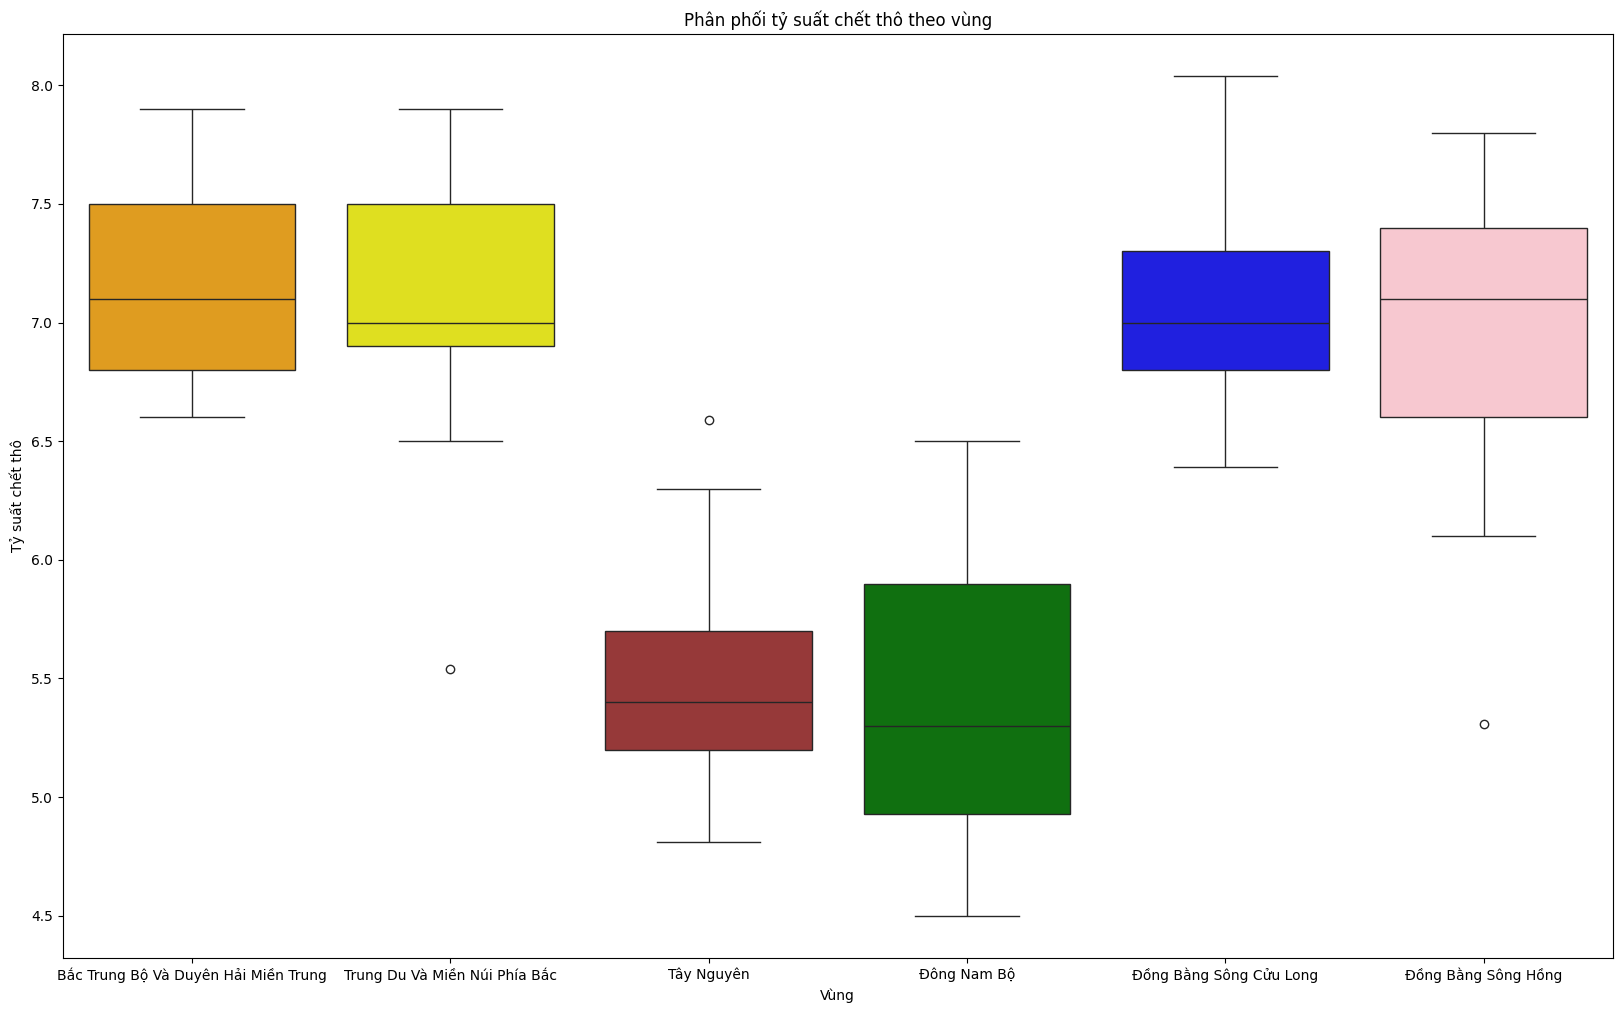

In [34]:
# palette = final_df['Địa phương'].map(color_map)

plt.figure(figsize=(20, 12))
sns.boxplot(x='Địa phương', y='Tỷ suất chết thô', data=area_df, palette=color_map)
plt.xlabel('Vùng')
plt.ylabel('Tỷ suất chết thô')
plt.title('Phân phối tỷ suất chết thô theo vùng')
plt.show()


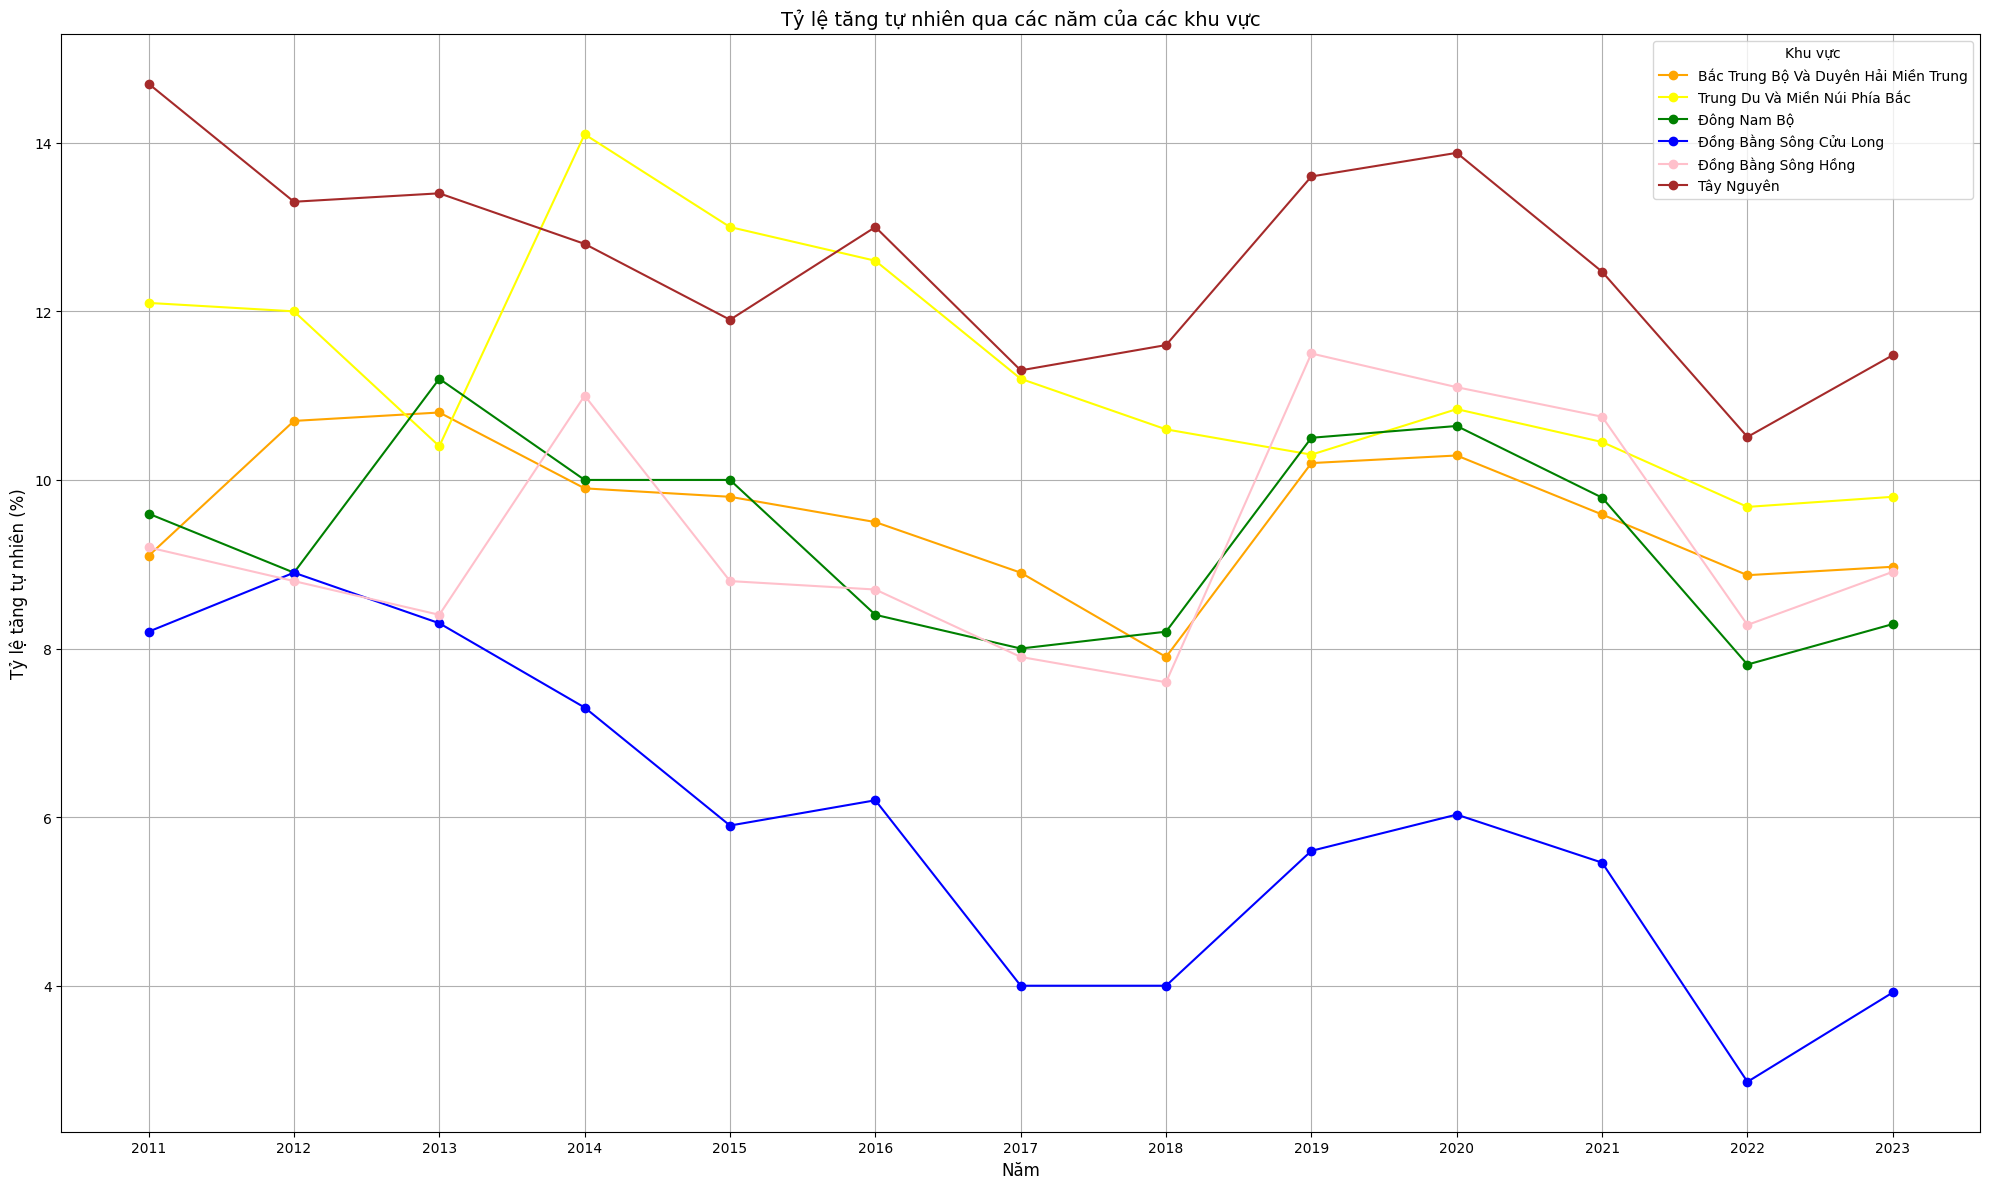

In [35]:
plt.figure(figsize=(20, 12))
for region in area:
    region_data = area_df[area_df['Địa phương'] == region]
    plt.plot(region_data['Năm'], region_data['Tỷ lệ tăng tự nhiên'],
             label=region, marker='o', color=color_map[region])

plt.title('Tỷ lệ tăng tự nhiên qua các năm của các khu vực', fontsize=14)
plt.xlabel('Năm', fontsize=12)
plt.ylabel('Tỷ lệ tăng tự nhiên (%)', fontsize=12)

plt.legend(title='Khu vực')

plt.grid(True)
plt.xticks(area_df['Năm'].unique())
plt.tight_layout()
plt.show()

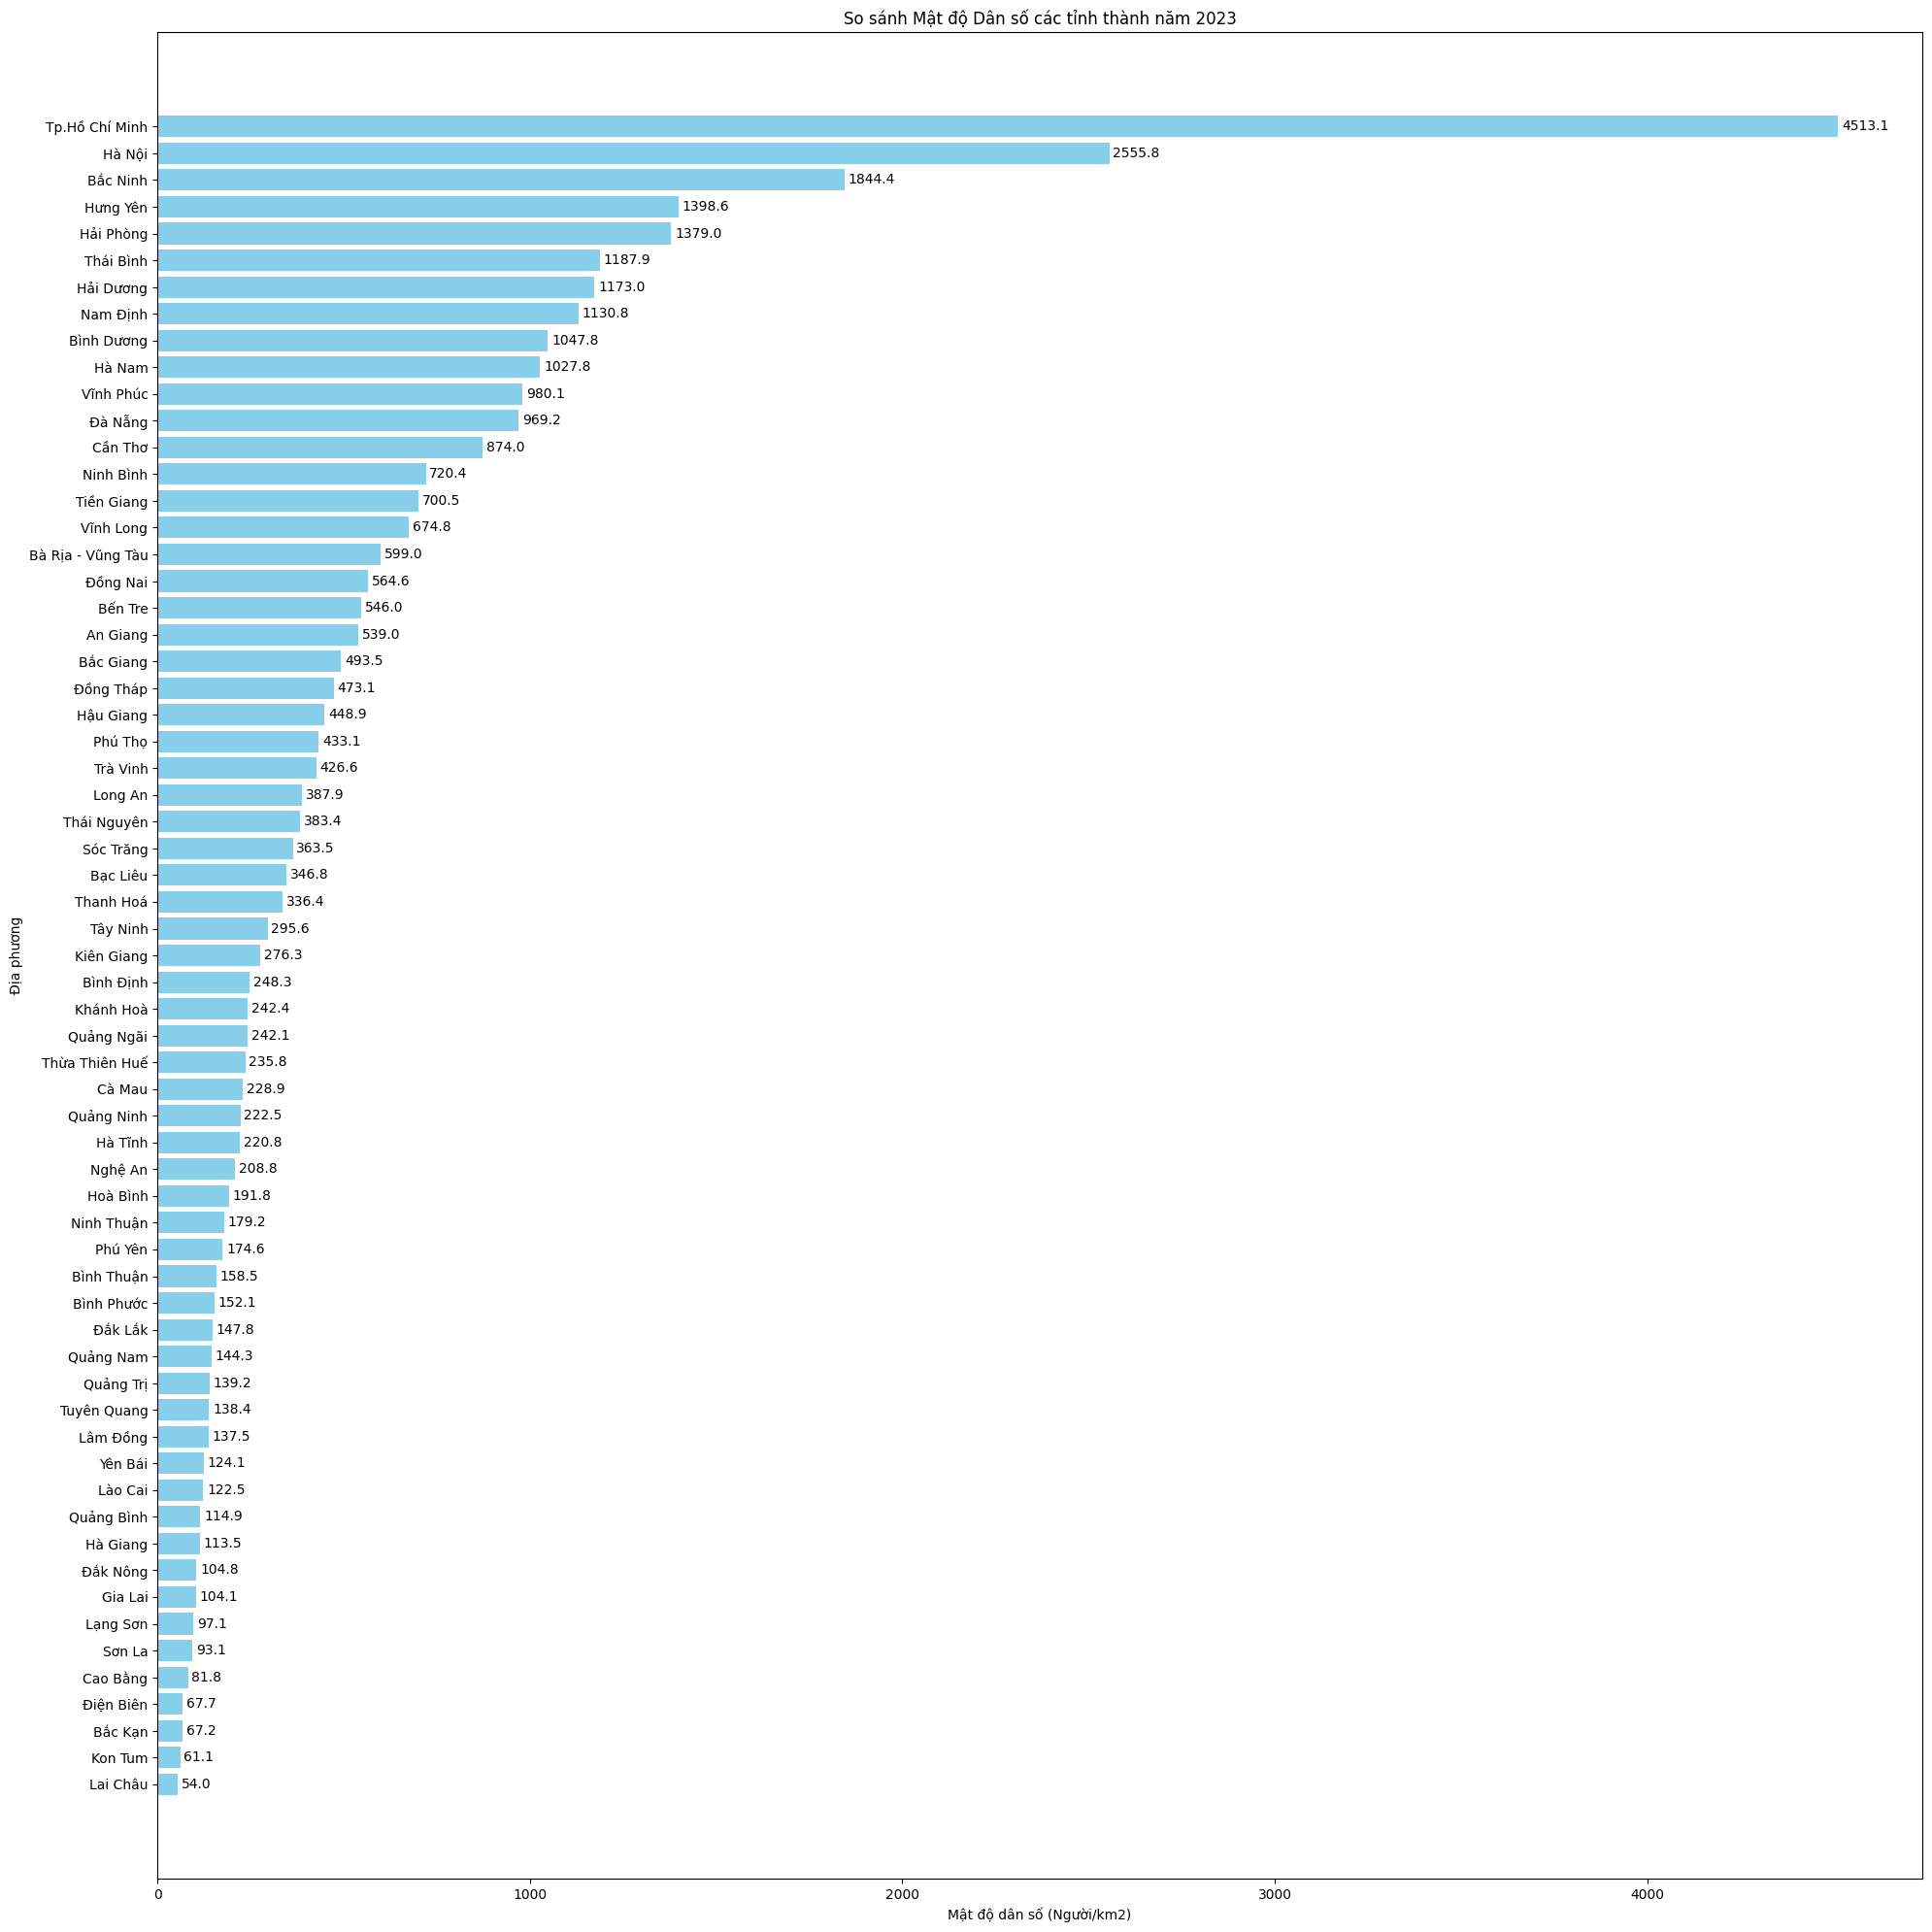

In [36]:
df_2023 = city_df[city_df['Năm'] == 2023 ].sort_values(by='Mật độ dân số (Người/km2)', ascending=True)

plt.figure(figsize=(20, 20))
bars = plt.barh(df_2023['Địa phương'], df_2023['Mật độ dân số (Người/km2)'], color='skyblue')

plt.title('So sánh Mật độ Dân số các tỉnh thành năm 2023')
plt.xlabel('Mật độ dân số (Người/km2)')
plt.ylabel('Địa phương')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

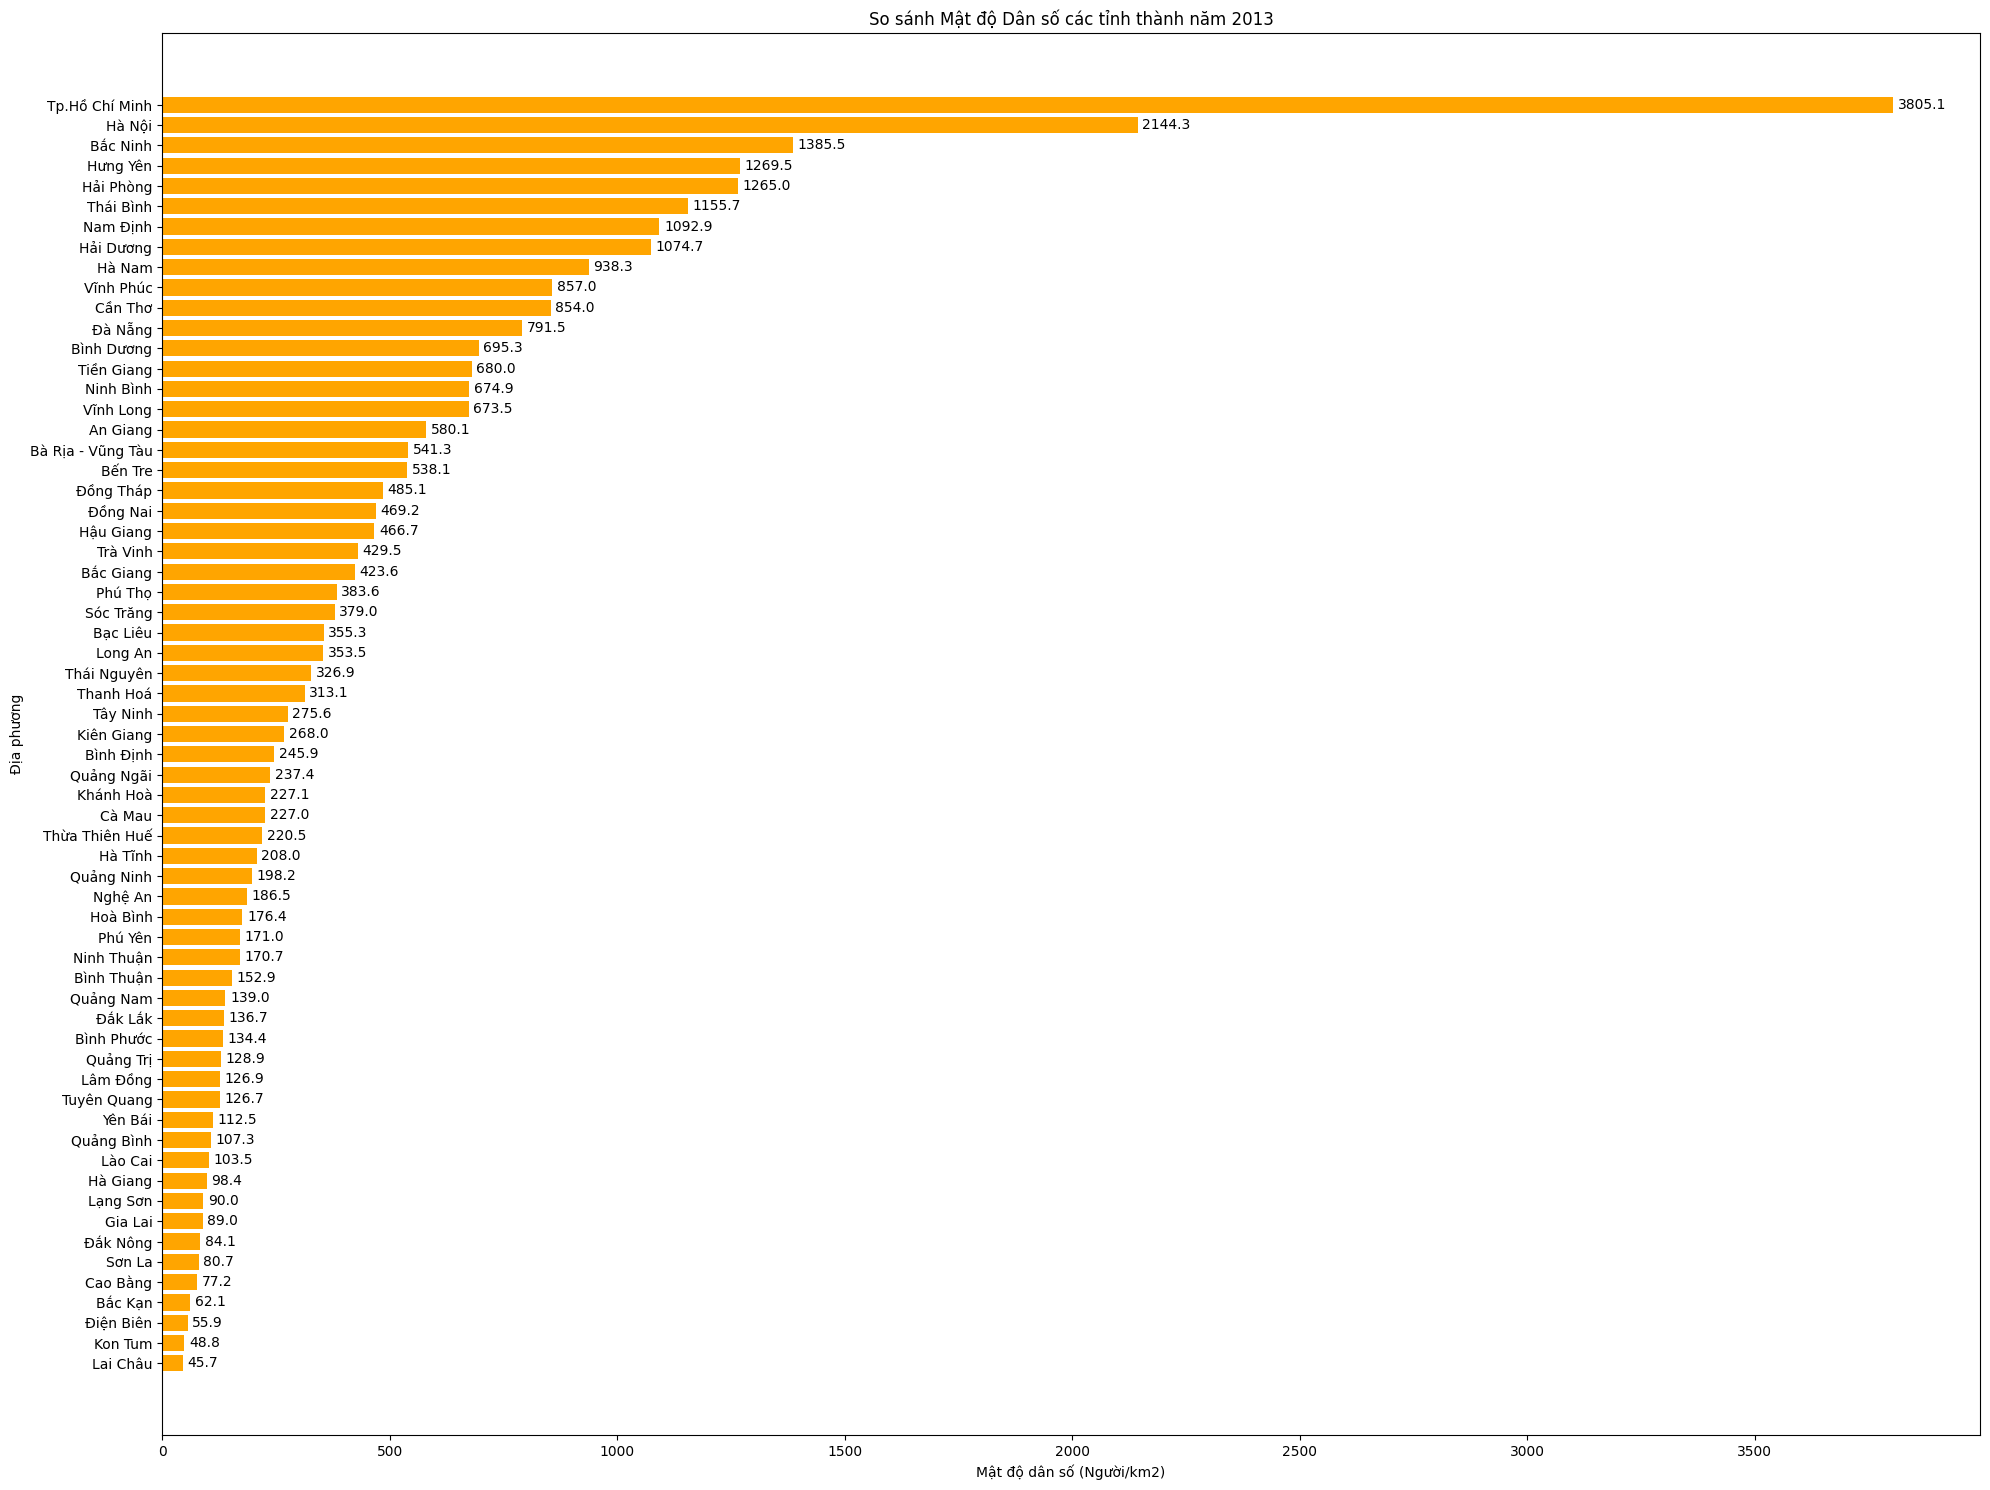

In [37]:
df_2013 = city_df[city_df['Năm'] == 2013 ].sort_values(by='Mật độ dân số (Người/km2)', ascending=True)

plt.figure(figsize=(20, 15))
bars = plt.barh(df_2013['Địa phương'], df_2013['Mật độ dân số (Người/km2)'], color='orange')

plt.title('So sánh Mật độ Dân số các tỉnh thành năm 2013')
plt.xlabel('Mật độ dân số (Người/km2)')
plt.ylabel('Địa phương')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.1f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [38]:
def scatter(column1, column2, year, hue_col, size_col, ax):
    sub_df = city_df[city_df['Năm'] == year]
    sns.scatterplot(data=sub_df, x=column1, y=column2, size=size_col, palette='viridis', sizes=(50, 500), hue=hue_col, legend=False, ax=ax)
    ax.set_xlabel(f'{column1}')
    ax.set_ylabel(f'{column2}')
    ax.set_title(f'Scatterplot giữa {column1} và {column2} (Năm {year})')
    ax.grid(True)

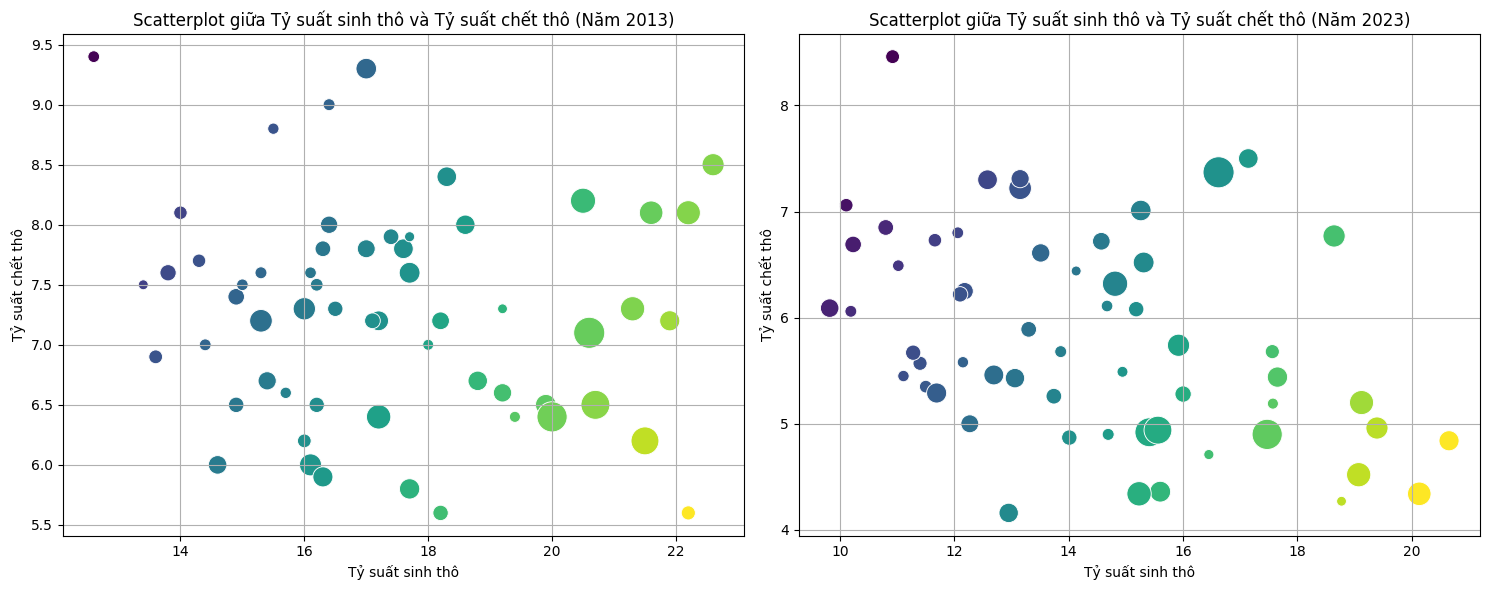

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
years = [2013, 2023]

for index, year in enumerate(years):
  scatter('Tỷ suất sinh thô', 'Tỷ suất chết thô', year, 'Tỷ lệ tăng tự nhiên', 'Diện tích(Km2)', axs[index])

plt.tight_layout()
plt.show()


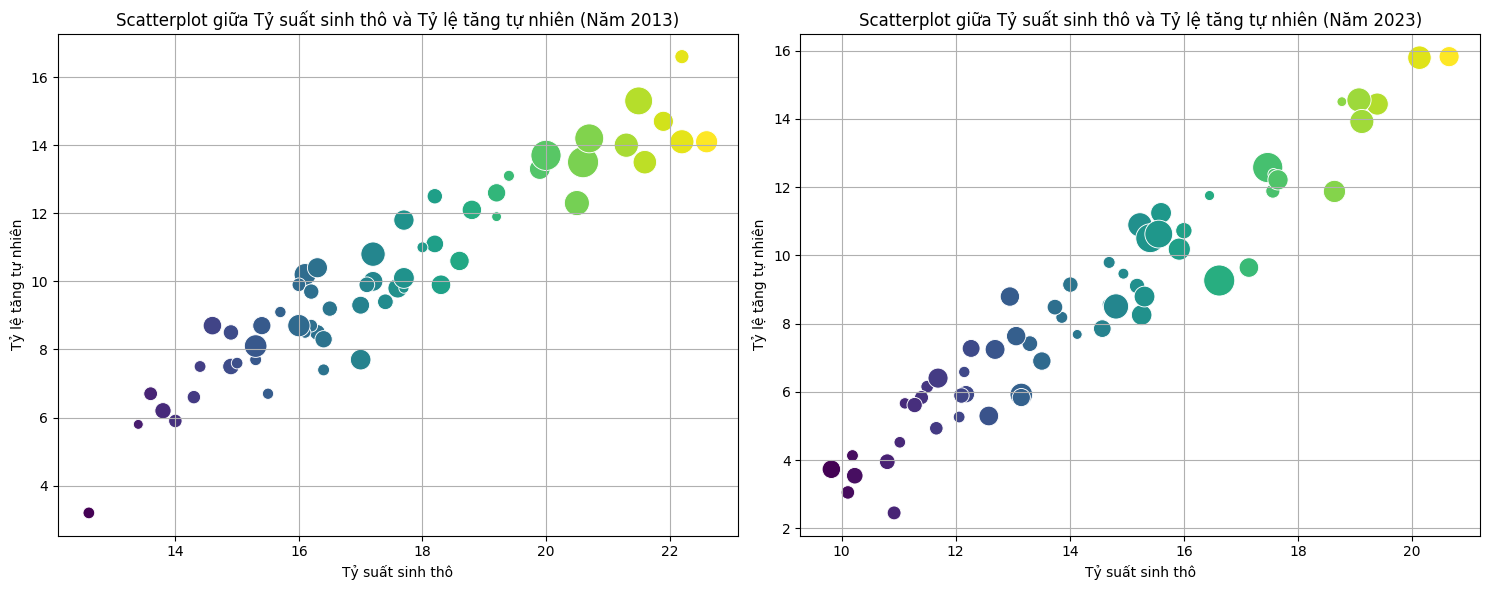

In [40]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
years = [2013, 2023]

for index, year in enumerate(years):
  scatter('Tỷ suất sinh thô', 'Tỷ lệ tăng tự nhiên', year, 'Tỷ suất sinh thô', 'Diện tích(Km2)', axs[index])

plt.tight_layout()
plt.show()


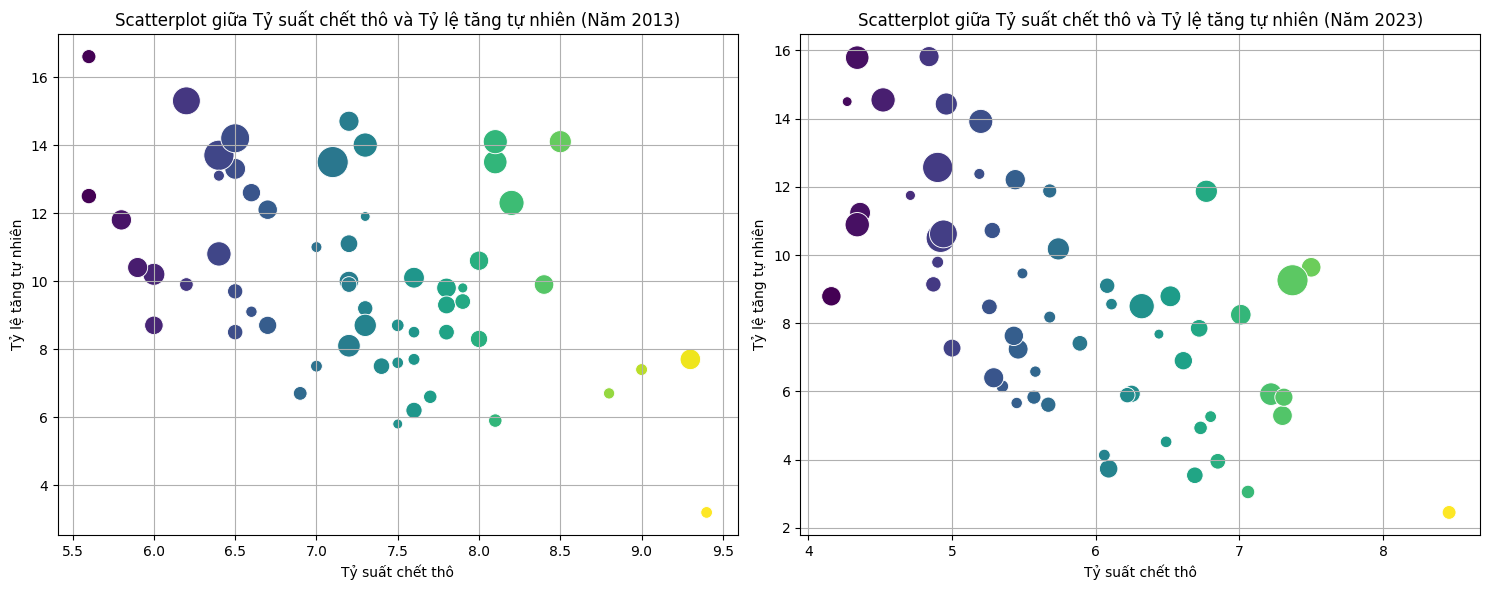

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs = axs.flatten()
years = [2013, 2023]

for index, year in enumerate(years):
  scatter('Tỷ suất chết thô', 'Tỷ lệ tăng tự nhiên', year, 'Tỷ suất chết thô', 'Diện tích(Km2)', axs[index])

plt.tight_layout()
plt.show()


In [42]:
city_df['Địa phương'].unique()

array(['An Giang', 'Bà Rịa - Vũng Tàu', 'Bình Dương', 'Bình Phước',
       'Bình Thuận', 'Bình Định', 'Bạc Liêu', 'Bắc Giang', 'Bắc Kạn',
       'Bắc Ninh', 'Bến Tre', 'Cao Bằng', 'Cà Mau', 'Cần Thơ', 'Gia Lai',
       'Hoà Bình', 'Hà Giang', 'Hà Nam', 'Hà Nội', 'Hà Tĩnh', 'Hưng Yên',
       'Hải Dương', 'Hải Phòng', 'Hậu Giang', 'Khánh Hoà', 'Kiên Giang',
       'Kon Tum', 'Lai Châu', 'Long An', 'Lào Cai', 'Lâm Đồng',
       'Lạng Sơn', 'Nam Định', 'Nghệ An', 'Ninh Bình', 'Ninh Thuận',
       'Phú Thọ', 'Phú Yên', 'Quảng Bình', 'Quảng Nam', 'Quảng Ngãi',
       'Quảng Ninh', 'Quảng Trị', 'Sóc Trăng', 'Sơn La', 'Thanh Hoá',
       'Thái Bình', 'Thái Nguyên', 'Thừa Thiên Huế', 'Tiền Giang',
       'Tp.Hồ Chí Minh', 'Trà Vinh', 'Tuyên Quang', 'Tây Ninh',
       'Vĩnh Long', 'Vĩnh Phúc', 'Yên Bái', 'Điện Biên', 'Đà Nẵng',
       'Đắk Lắk', 'Đắk Nông', 'Đồng Nai', 'Đồng Tháp'], dtype=object)

In [43]:
gdf = gpd.read_file('/content/diaphantinh.geojson')

In [44]:
set(gdf['ten_tinh'].unique()) - set(city_df['Địa phương'].unique())

{'Bà Rịa -Vũng Tàu',
 'Cần Thơn',
 'Hòa Bình',
 'Khánh Hòa',
 'Kien Giang',
 'Quản Bình',
 'TP. Hồ Chí Minh',
 'Thanh Hóa',
 'Đăk Lăk',
 'Đăk Nông'}

In [45]:
set(city_df['Địa phương'].unique()) - set(gdf['ten_tinh'].unique())

{'Bà Rịa - Vũng Tàu',
 'Cần Thơ',
 'Hoà Bình',
 'Khánh Hoà',
 'Kiên Giang',
 'Quảng Bình',
 'Thanh Hoá',
 'Tp.Hồ Chí Minh',
 'Đắk Lắk',
 'Đắk Nông'}

In [46]:
def gdf_change_name(old_name, new_name):
    gdf['ten_tinh'] = gdf['ten_tinh'].str.replace(old_name, new_name)

In [47]:
gdf_change_name('Bà Rịa -Vũng Tàu', 'Bà Rịa - Vũng Tàu')
gdf_change_name('Cần Thơn', 'Cần Thơ')
gdf_change_name('Hòa Bình', 'Hoà Bình')
gdf_change_name('Khánh Hòa', 'Khánh Hoà')
gdf_change_name('Quản Bình', 'Quảng Bình')
gdf_change_name('Kien Giang', 'Kiên Giang')
gdf_change_name('TP. Hồ Chí Minh', 'Tp.Hồ Chí Minh')
gdf_change_name('Thanh Hóa', 'Thanh Hoá')
gdf_change_name('Đăk Lăk', 'Đắk Lắk')
gdf_change_name('Đăk Nông', 'Đắk Nông')

In [48]:
merged_gdf = gdf.merge(city_df, left_on='ten_tinh', right_on='Địa phương')

In [49]:
set(city_df['Địa phương'].unique()) - set(merged_gdf['Địa phương'].unique())

set()

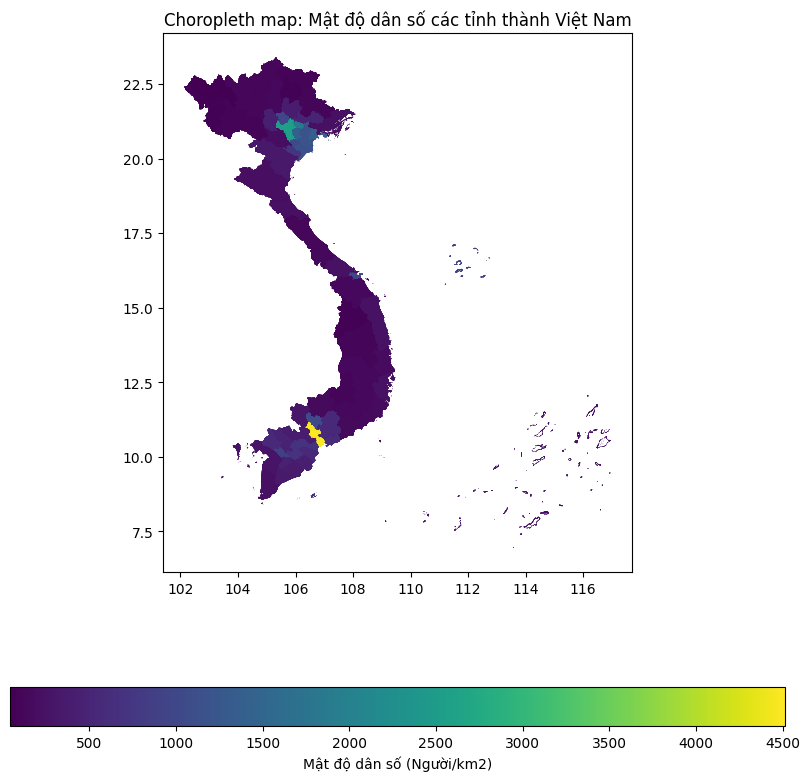

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='Mật độ dân số (Người/km2)', ax=ax, legend=True,
         legend_kwds={'label': "Mật độ dân số (Người/km2)", 'orientation': "horizontal"})
plt.title('Choropleth map: Mật độ dân số các tỉnh thành Việt Nam')
plt.show()